<a href="https://colab.research.google.com/github/AzizOzmen/Clarusway_Data_Science_Materials/blob/main/DV_Capstone_Project_Latest_Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

#**WELCOME!**

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# **#Determines**



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# **Tasks**


### **1.Import libraries**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### **2.Read dataset**

In [4]:
bike_usage = pd.read_csv('store_sharing.csv')

In [5]:
df = bike_usage.copy()

In [7]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### **3.Check missing values and if there are any dublicate rows or not.**

In [8]:
df.isnull().sum()

 # It looks like the is no missing values in our dataset

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [10]:
df.shape

# Returns a tuple representing the dimensionality of the DataFrame.

(17414, 10)

In [9]:
df.duplicated().value_counts()

# Returns boolean Series denoting duplicate rows.

False    17414
dtype: int64

False    17414
dtype: int64

**Extra features for recognizin our dataset**

In [11]:
df.columns

# returns the column labels of the DataFrame.

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [14]:
df.sample(10)

# Return a random sample of items from an axis of object.

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
7869,2015-11-29 13:00:00,1029,13.5,13.5,65.0,43.0,3.0,0.0,1.0,2.0
15552,2016-10-18 08:00:00,4702,12.5,12.5,79.5,18.5,2.0,0.0,0.0,2.0
8371,2015-12-20 16:00:00,690,11.0,11.0,85.0,19.5,7.0,0.0,1.0,3.0
351,2015-01-18 16:00:00,1111,3.0,2.0,81.0,6.0,2.0,0.0,1.0,3.0
10407,2016-03-14 20:00:00,814,6.0,3.0,73.5,18.0,1.0,0.0,0.0,0.0
15999,2016-11-06 00:00:00,342,5.0,1.0,70.0,19.5,1.0,0.0,1.0,2.0
3795,2015-06-11 14:00:00,1705,22.0,21.0,45.5,32.0,1.0,0.0,0.0,1.0
3938,2015-06-17 13:00:00,1627,22.5,22.5,59.0,25.0,1.0,0.0,0.0,1.0
9355,2016-01-30 16:00:00,1481,7.0,3.0,49.0,28.0,1.0,0.0,1.0,3.0
3067,2015-05-12 03:00:00,60,12.5,12.5,69.5,14.0,1.0,0.0,0.0,0.0


In [15]:
df.weather_code.value_counts(normalize=True)

# Returns a Series containing counts of unique values.
# 'normalize=', default False. If True then the object returned will contain 
# the relative frequencies of the unique values.

1.0     0.353164
2.0     0.231653
3.0     0.203916
7.0     0.122947
4.0     0.084070
26.0    0.003446
10.0    0.000804
Name: weather_code, dtype: float64

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog

In [40]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [47]:
df.groupby(['is_weekend','weather_code']).cnt.sum()

is_weekend  weather_code
0.0         1.0             5485671
            2.0             4678650
            3.0             3169359
            4.0              511472
            7.0             1184982
            10.0               6891
            26.0              11191
1.0         1.0             1661176
            2.0             1356930
            3.0             1074528
            4.0              418506
            7.0              341479
            10.0               1277
            26.0               3860
Name: cnt, dtype: int64

### **4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)**

In [48]:
df.shape

(17414, 10)

In [52]:
x = df.season.values
x

array([3., 3., 3., ..., 3., 3., 3.])

In [53]:
y = df.season.index
y

RangeIndex(start=0, stop=17414, step=1)

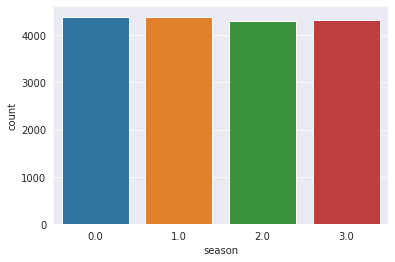

In [59]:
# season
sns.countplot(x = 'season', data = df);

# Shows the counts of observations in each category for "season" using bars.

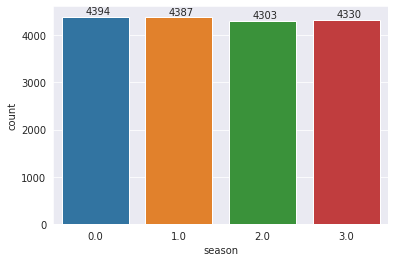

In [69]:
ax = sns.countplot(x="season", data=df)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.28, p.get_height()+50))

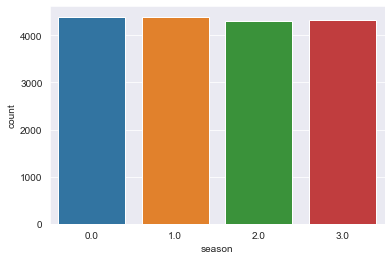

In [ ]:
# season

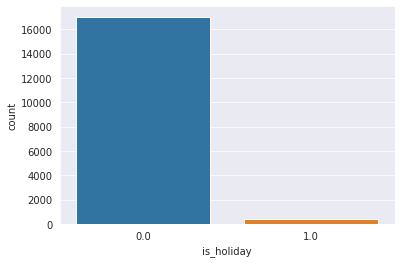

In [72]:
# is_holiday
sns.countplot(x = 'is_holiday', data = df);

# Shows the counts of observations in each category for "is_holiday" using bars.

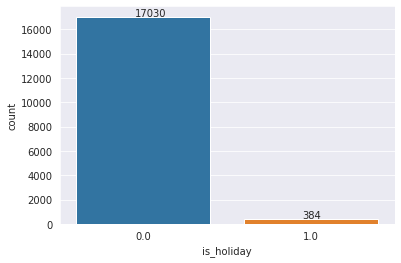

In [77]:
ax = sns.countplot(x = 'is_holiday', data = df);
for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+55))

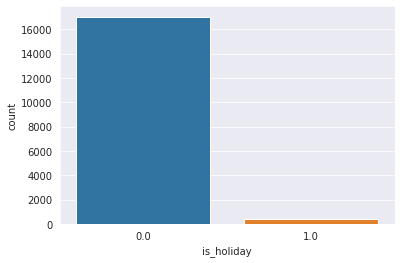

In [ ]:
# is_holiday


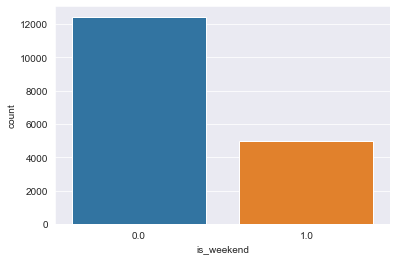

In [ ]:
# is_weekend
sns.countplot(x = 'is_weekend', data = df);

# Shows the counts of observations in each category for "is_weekend" using bars.

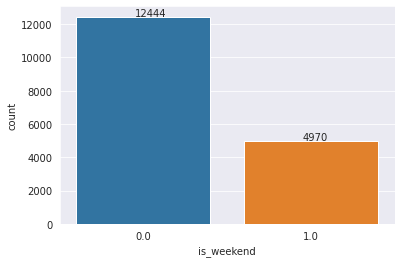

In [78]:
ax = sns.countplot(x = 'is_weekend', data = df);
for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+55))

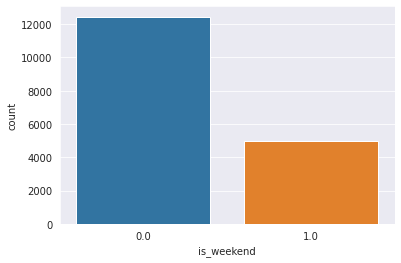

In [ ]:
# is_weekend


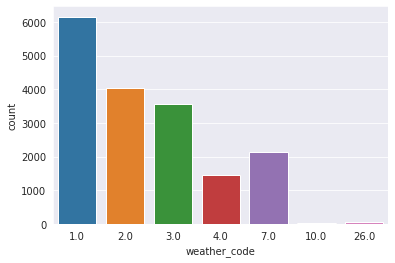

In [79]:
# weather_code
sns.countplot(x = 'weather_code', data = df);

# Shows the counts of observations in each category for "weather_code" using bars.

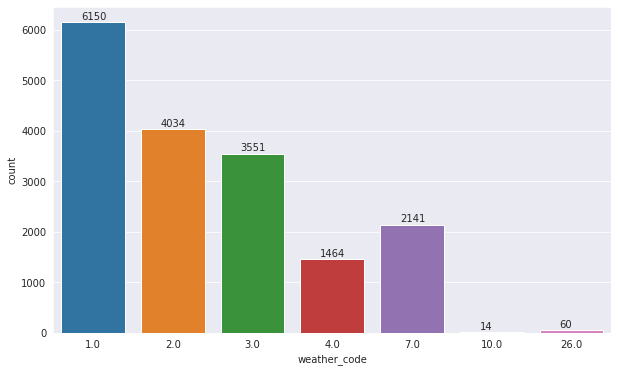

In [87]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'weather_code', data = df);
for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+55))

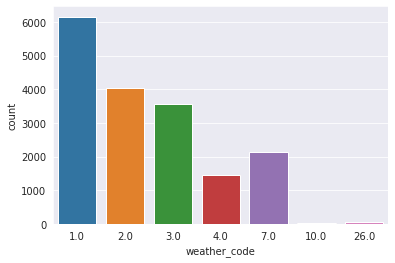

In [ ]:
# weather_code


### **5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.**

In [88]:
df.info()

# Prints a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [89]:
df.timestamp = pd.to_datetime(df.timestamp)

# Converts our argument ("timestamp" column in our DF) to datetime.

In [92]:
df.timestamp

# We checked the type of "timestamp" column to be converted to "dtype: datetime64"

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

In [95]:
df2 = df.set_index('timestamp')

# Sets the DataFrame index using existing columns.
# For the future use, we set the index our DF as 'timestamp' and assigned as df2

In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


In [98]:
df2.head()

# We checked if the index of our DF was converted as "timestamp" 

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

There has been a two-year-timestamp period. Now it is time to make future endineering by using 'year, month, day_of_month, day_of_week, hour'. 

### **6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)**

**you can use strftime('%Y-%m') for year_mount**

In [99]:
import datetime as dt

In [101]:
df2['date'] = pd.to_datetime(df2.index, format='%Y%m%d')
df2['year_month'] = pd.to_datetime(df2.date).dt.to_period('M') 
df2['year'] = pd.DatetimeIndex(df2.index).year
df2['month'] = pd.DatetimeIndex(df2.index).month
df2['day_of_month'] = pd.DatetimeIndex(df2.index).day
df2['day_of_week'] = pd.DatetimeIndex(df2.index).dayofweek
df2['hour'] = pd.DatetimeIndex(df2.index).hour
df2.drop('date', axis = 1, inplace = True)

In [102]:
df2.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### **7.Visualize the correlation with a heatmap**

In [104]:
df3 = df2.drop("year_month", axis = 1)

# We need to drop "year_month" column since it prevents to plot the correlation with a heatmap

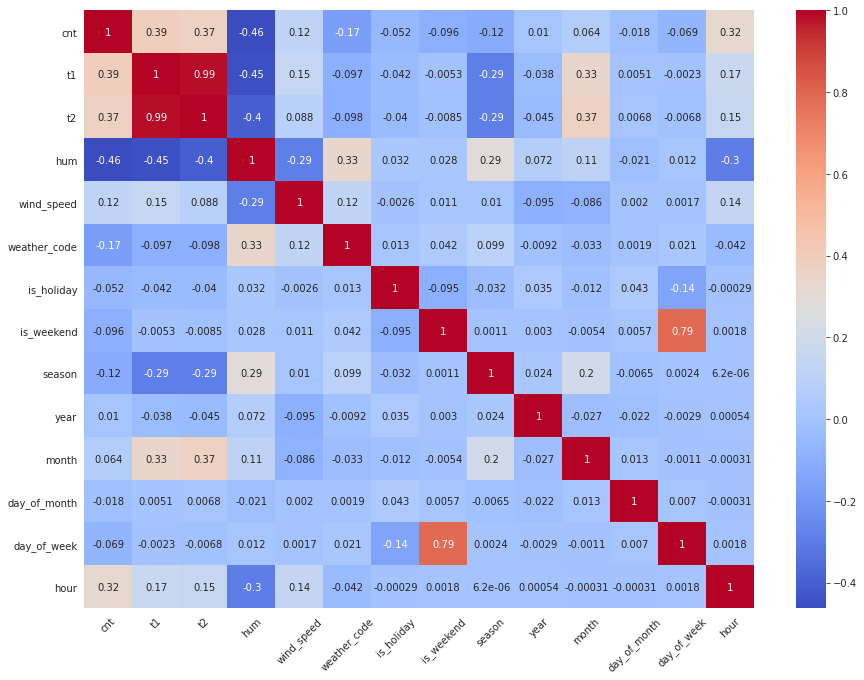

In [115]:
plt.figure(figsize = (15,11))
sns.heatmap(data = df3.corr(), cmap = 'coolwarm', annot = True)
plt.xticks(rotation=45);

# A heatmap is a two-dimensional graphical representation of data where the individual 
# values that are contained in a matrix are represented as colors.

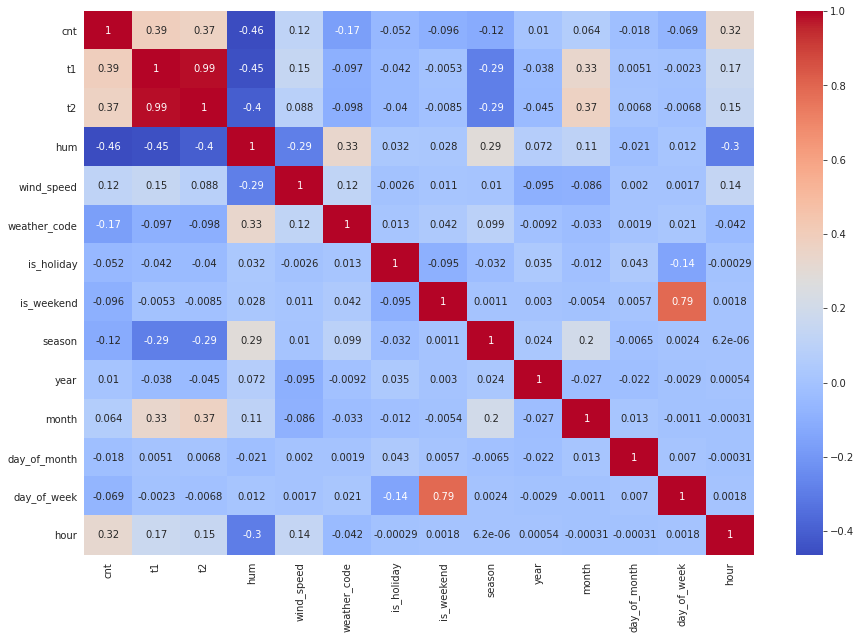

In [ ]:
# for all variables 


In [116]:
df2.shape

(17414, 15)

In [119]:
df3.shape

(17414, 14)

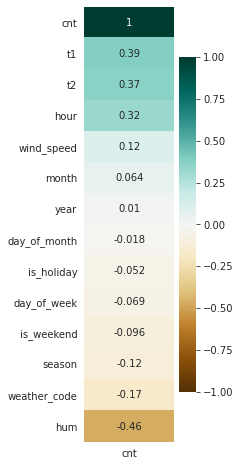

In [143]:
plt.figure(figsize=(2, 8))

heatmap = sns.heatmap(df3.corr()[['cnt']].sort_values(by='cnt', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG');


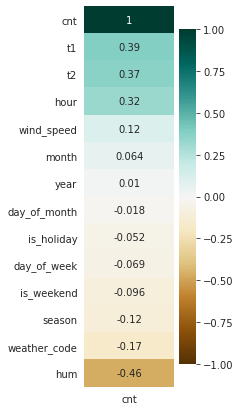

In [ ]:
# for the target variable


### **8. Visualize the correlation of the target variable and the other features with barplot**

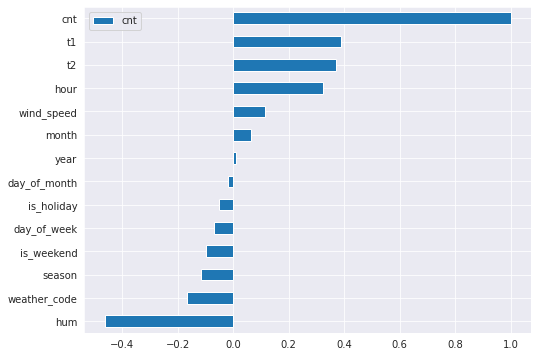

In [144]:
#with pandas

df3.corr()[['cnt']].sort_values(by='cnt', ascending=True).plot.barh(figsize=(8,6));

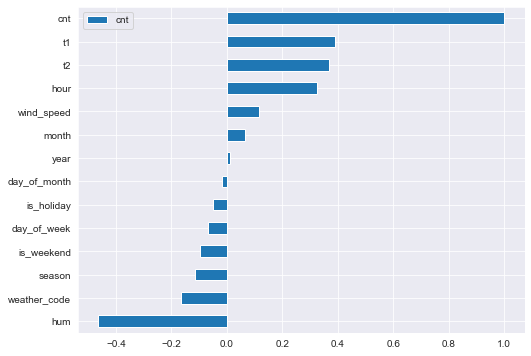

### **9.Plot bike shares over time use lineplot**

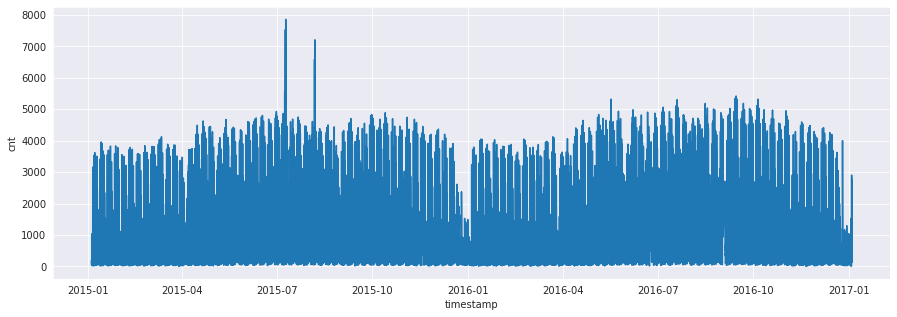

In [149]:
# with lineplot

plt.figure(figsize=(15, 5))
sns.lineplot(x = "timestamp", y = "cnt", data = df3);

# Line plot helps to visualize the relationship between two variables by drawing 
# the line across the data points which are "timestamp" and "cnt" in our case.

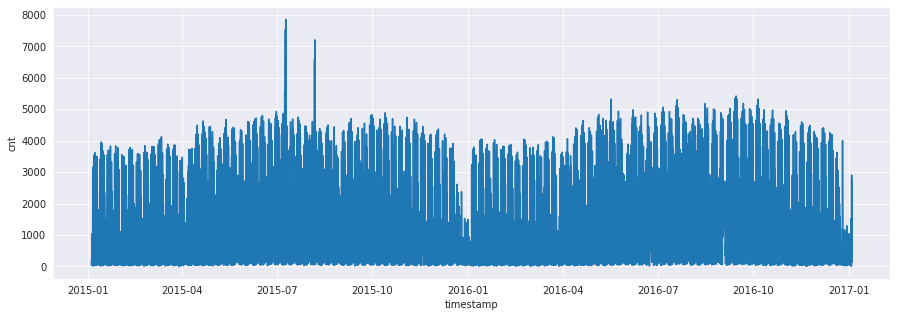

In [ ]:
# with lineplot


### **10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)**

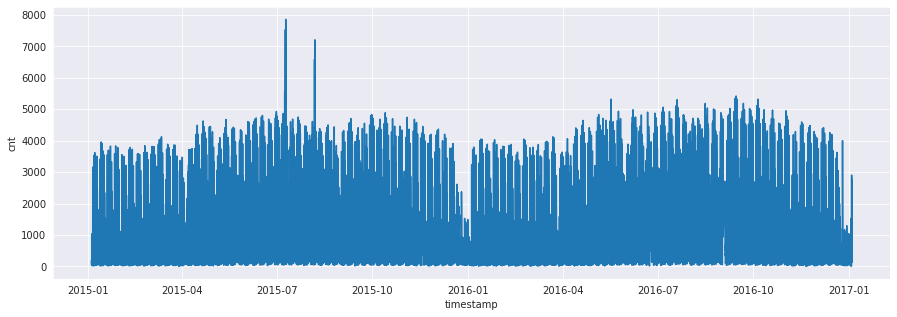

In [152]:
# with lineplot

plt.figure(figsize=(15, 5))
sns.lineplot(x = "timestamp", y = "cnt", data = df3);

In [153]:
df2.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


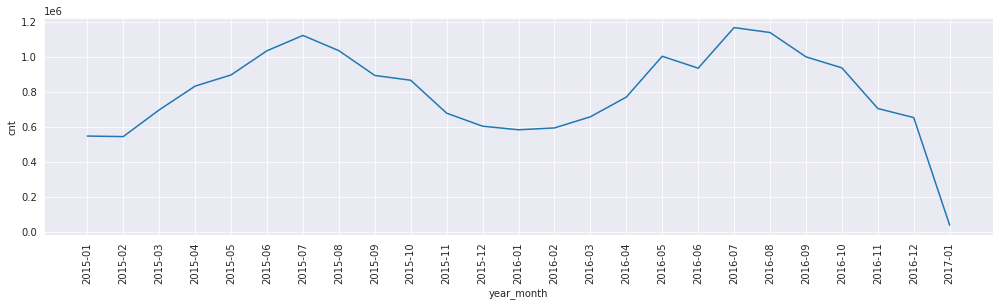

In [154]:
# with lineplot

df2.year_month = df2.year_month.astype(str)
df4 = df2.groupby(["year_month"])[["cnt"]].sum().reset_index()
plt.figure(figsize=(17,4))
plt.xticks(rotation = 90)
sns.lineplot(x = "year_month", y ="cnt", data = df4);

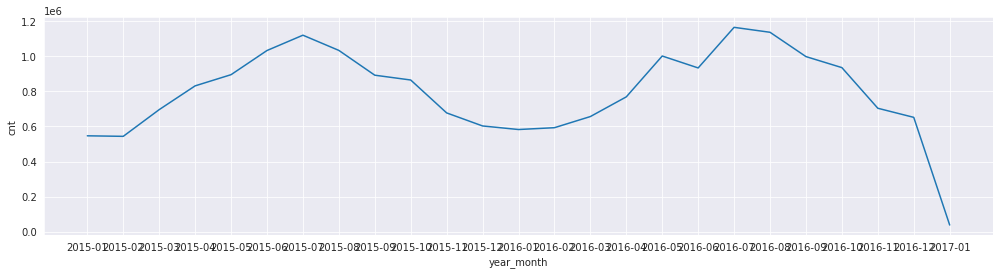

In [155]:
# with lineplot

plt.figure(figsize=(17, 4))
sns.lineplot(x = 'year_month', y = 'cnt', data = df2, estimator = 'sum', ci = None);

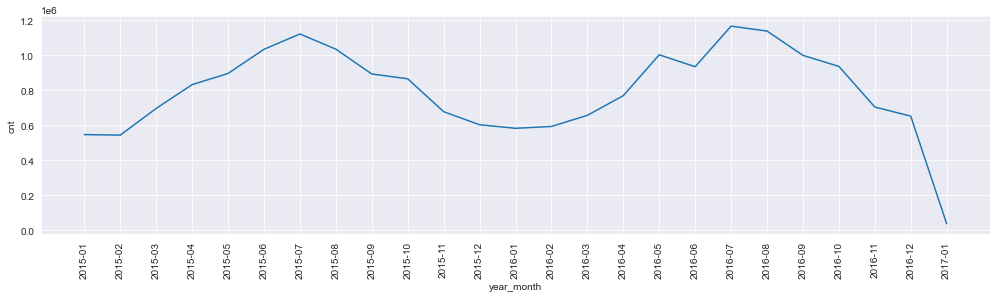

In [ ]:
# with lineplot

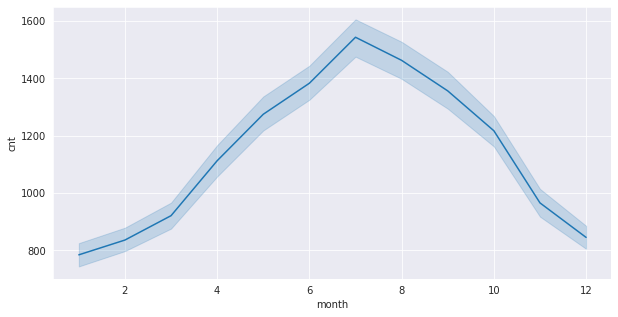

In [156]:
# with lineplot

plt.figure(figsize=(10,5))
sns.lineplot(x = "month", y ="cnt", data = df3);

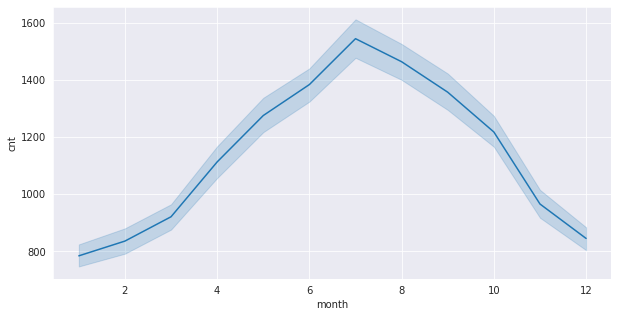

In [ ]:
# with lineplot


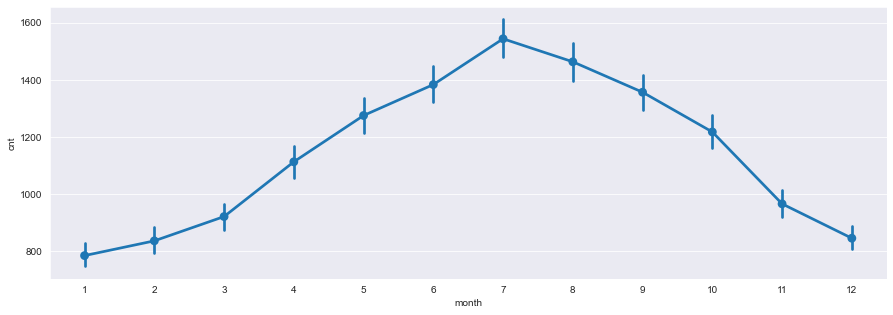

In [ ]:
# with pointplot

plt.figure(figsize=(15,5))
sns.pointplot(x = "month", y ="cnt", data = df3);

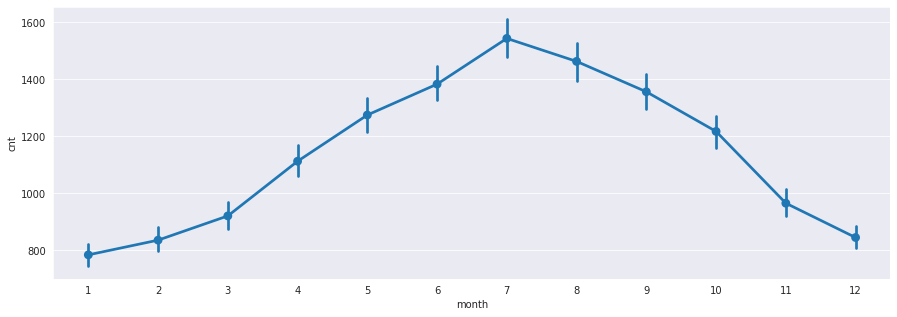

In [ ]:
# with pointplot

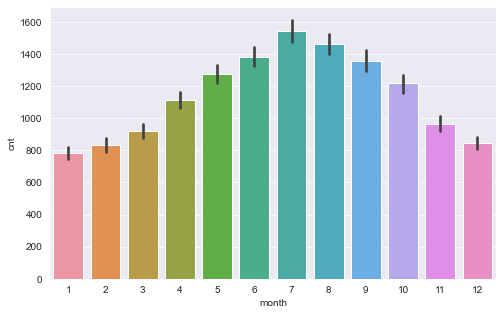

In [ ]:
# with barplot

plt.figure(figsize=(8,5))
sns.barplot(x = "month", y ="cnt", data = df3, ci= 95);

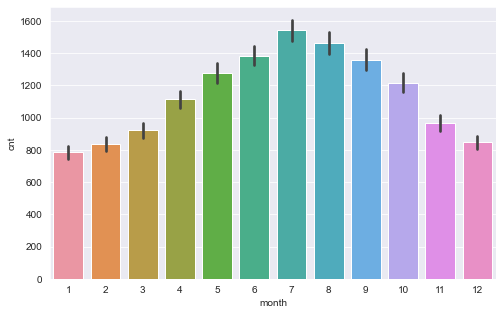

### **11.Plot bike shares by hours on (holidays, weekend, season)**


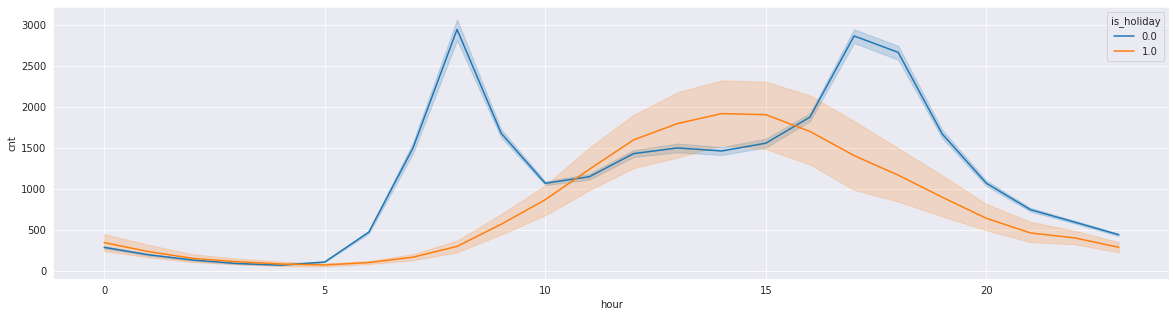

In [157]:
# with lineplot (*whether it is a holiday or not*)

plt.figure(figsize=(20, 5))
sns.lineplot(x = 'hour', y = 'cnt', hue = 'is_holiday', data = df2);

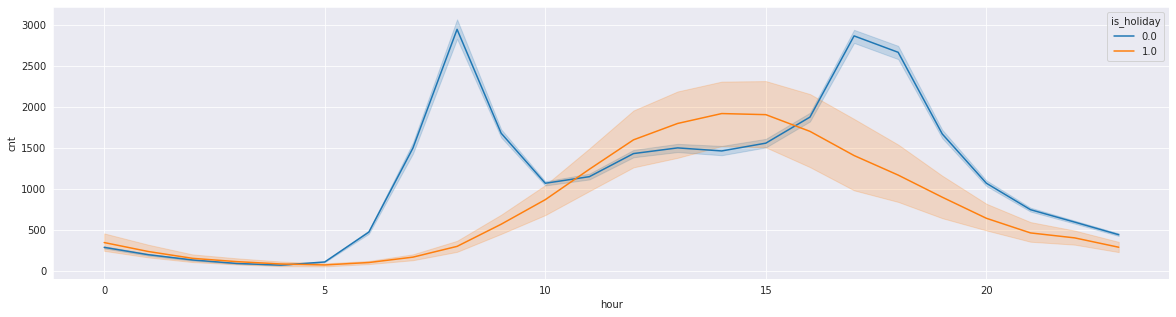

In [ ]:
# with lineplot (*whether it is a holiday or not*)

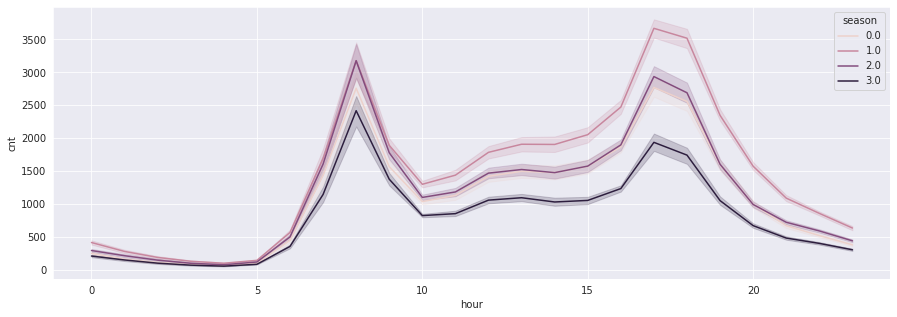

In [158]:
# with lineplot (*whether it is a holiday or not*)

plt.figure(figsize=(15, 5))
sns.lineplot(x = 'hour', y = 'cnt', hue = 'season', data = df2);

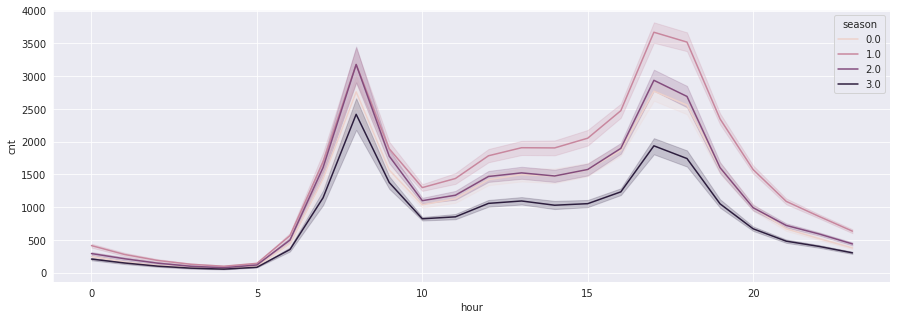

In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)


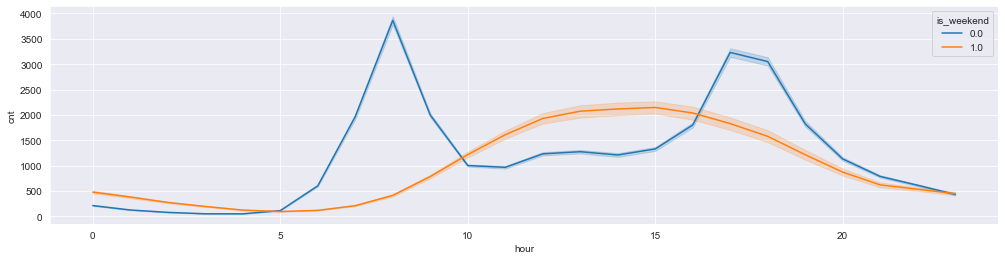

In [ ]:
# with lineplot (*whether it is a holiday or not*)

plt.figure(figsize=(17, 4))
sns.lineplot(x = 'hour', y = 'cnt', hue = 'is_weekend', data = df2);

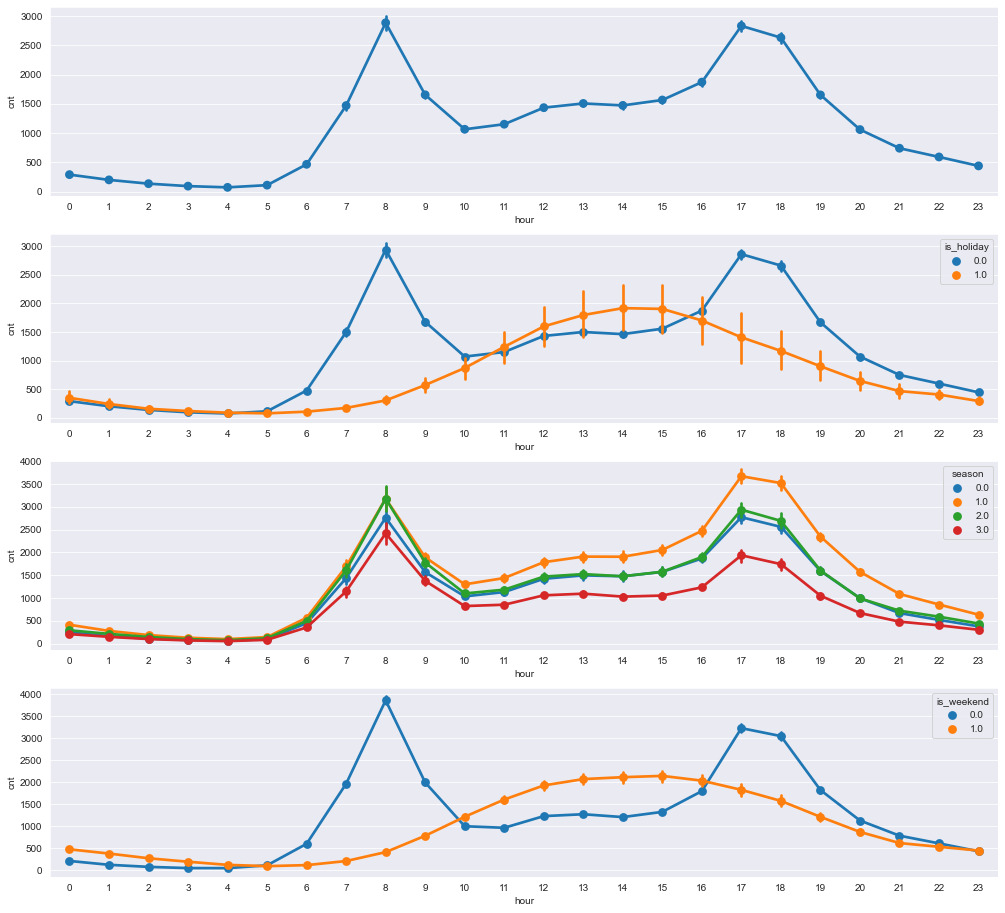

In [ ]:
# with lineplot (*whether it is a holiday or not*)

fig, ax =plt.subplots(4, 1, figsize=(17, 16))
sns.pointplot(x = "hour", y = "cnt", data= df2, ax = ax[0])
sns.pointplot(x = 'hour', y = 'cnt', hue = 'is_holiday', data = df2, ax = ax[1]);
sns.pointplot(x = 'hour', y = 'cnt', hue = 'season', data = df2, ax = ax[2]);
sns.pointplot(x = 'hour', y = 'cnt', hue = 'is_weekend', data = df2, ax = ax[3]);

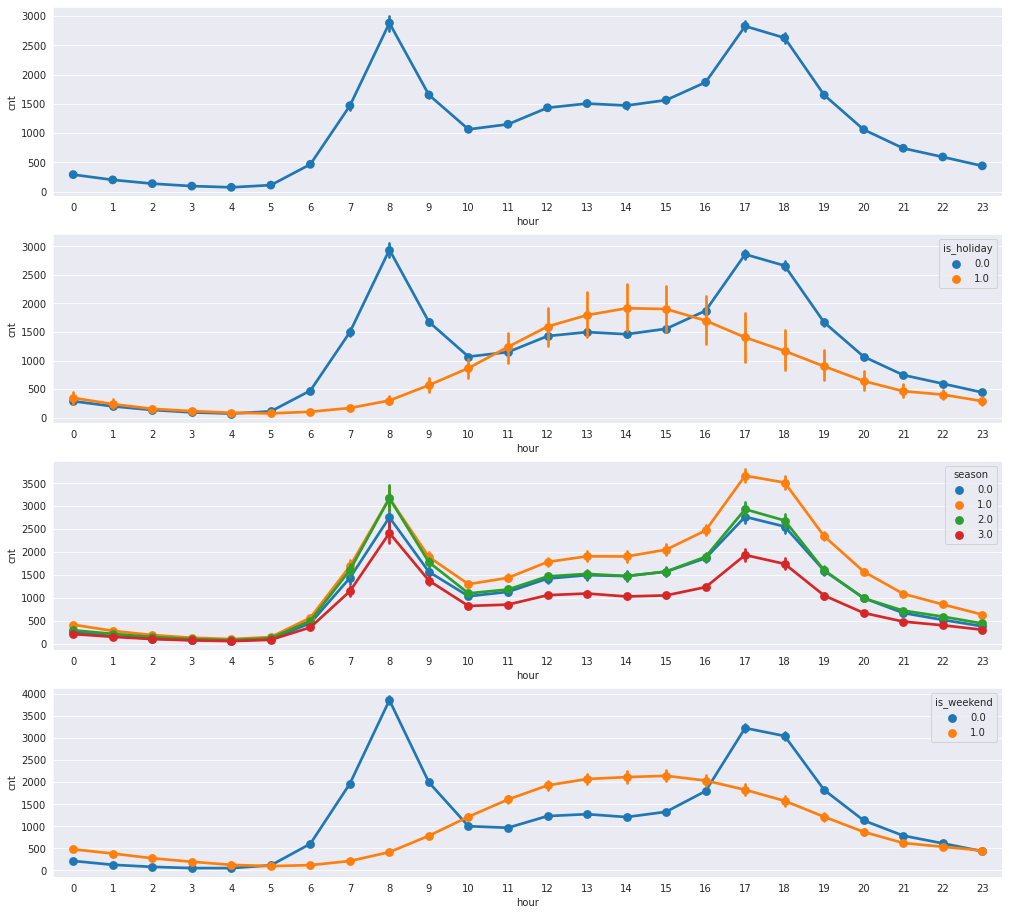

In [159]:
# with lineplot (*whether it is a holiday or not*)

fig, ax =plt.subplots(4, 1, figsize=(17, 16))
sns.pointplot(x = "hour", y = "cnt", data= df2, ax = ax[0])
sns.pointplot(x = 'hour', y = 'cnt', hue = 'is_holiday', data = df2, ax = ax[1]);
sns.pointplot(x = 'hour', y = 'cnt', hue = 'season', data = df2, ax = ax[2]);
sns.pointplot(x = 'hour', y = 'cnt', hue = 'is_weekend', data = df2, ax = ax[3]);

### **12.Plot bike shares by day of week**
**- You may want to see whether it is a holiday or not**

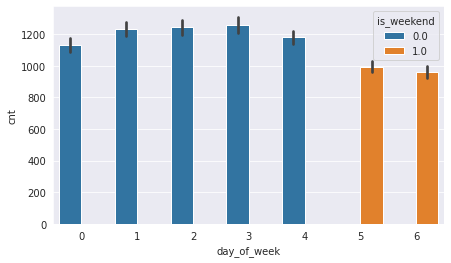

In [161]:
# with barplot

plt.figure(figsize = (7,4))
sns.barplot(x = "day_of_week", y = "cnt", hue = "is_weekend", data= df2);

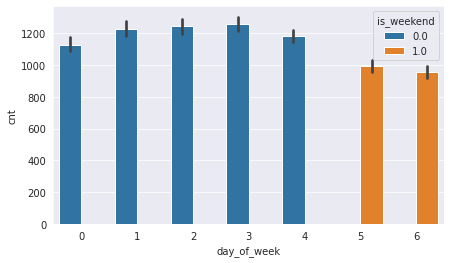

In [ ]:
# with barplot


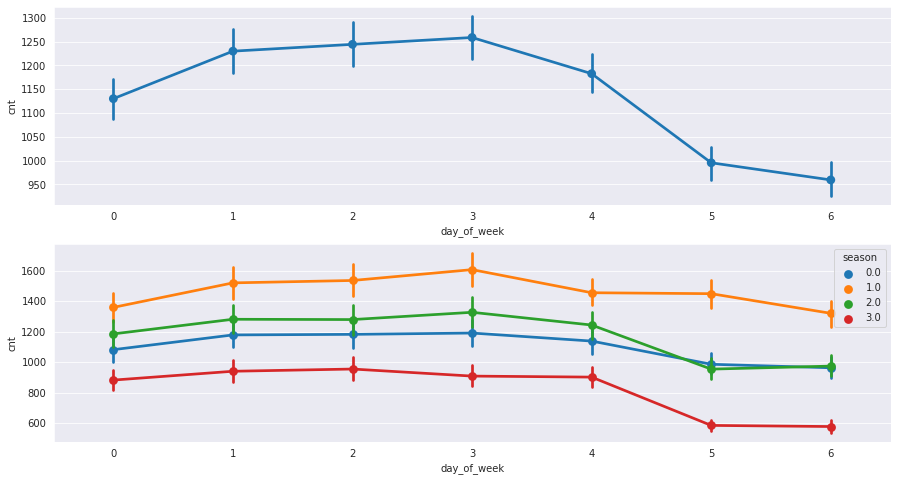

In [160]:
# with pointplot

fig, ax = plt.subplots(2, 1, figsize = (15,8))
sns.pointplot(data= df3, x = "day_of_week", y = "cnt", ax = ax[0])
sns.pointplot(data= df3, x = "day_of_week", y = "cnt", hue = "season", ax = ax[1]);

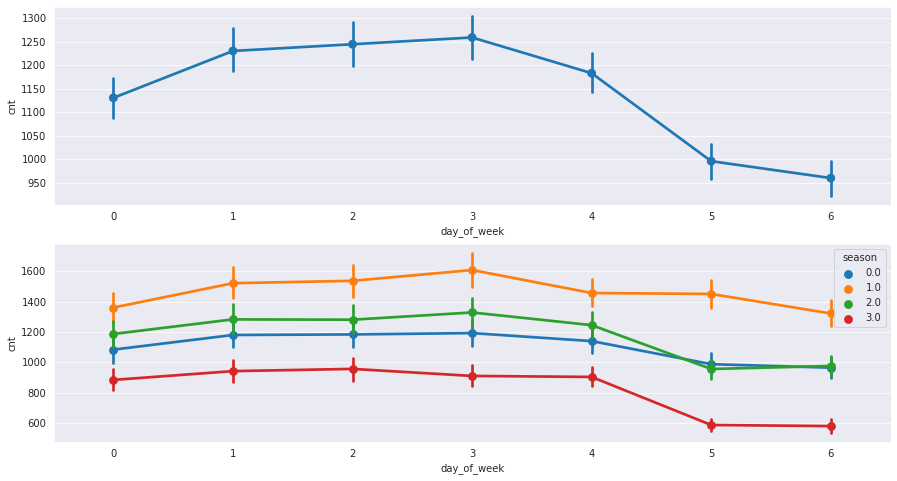

In [ ]:
# with pointplot


### **13.Plot bike shares by day of month**

In [163]:
df2.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [164]:
day_of_month = df2.groupby('day_of_month')[['cnt']].mean().astype('int').T

day_of_month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,1203,1166,1139,1123,1175,1140,1182,1178,1153,1115,1125,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


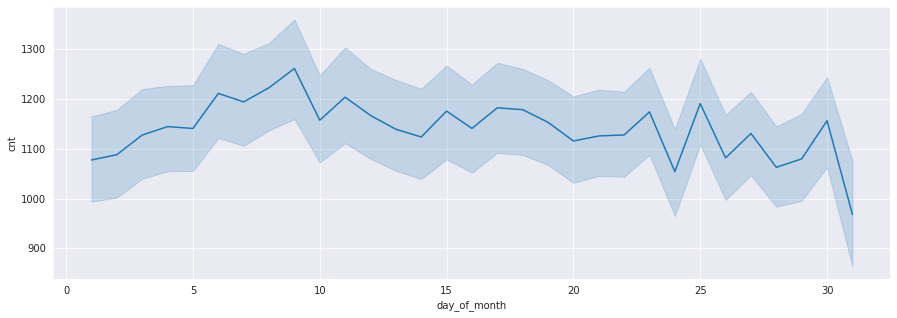

In [165]:
#with lineplot
display(day_of_month)
plt.figure(figsize = (15, 5))
sns.lineplot(data = df2, x = 'day_of_month', y = 'cnt');

day_of_month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


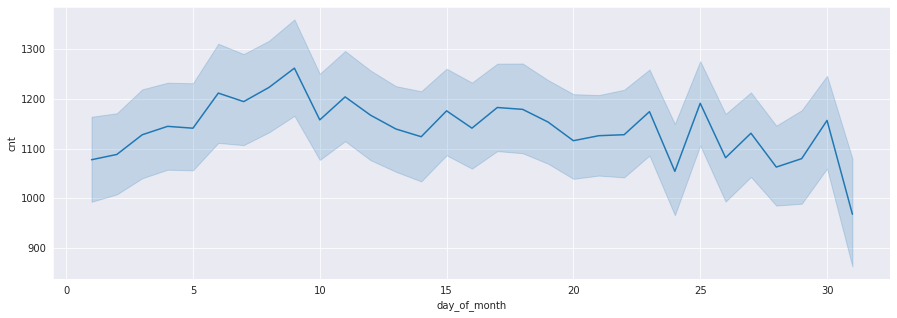

In [ ]:
#with lineplot

### **14.Plot bike shares by year**
### **Plot bike shares on holidays by seasons**

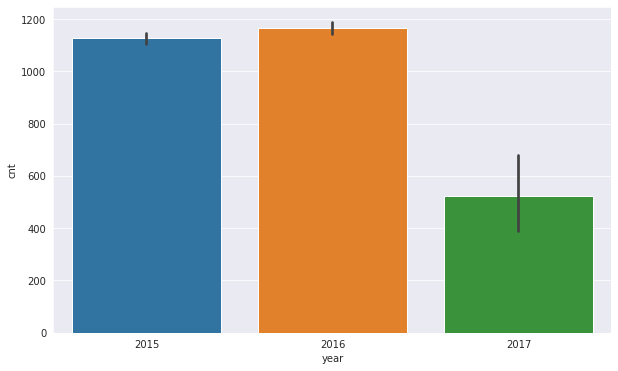

In [167]:
# with barplot

plt.figure(figsize = (10, 6))
sns.barplot(data = df2, x = 'year', y = 'cnt');

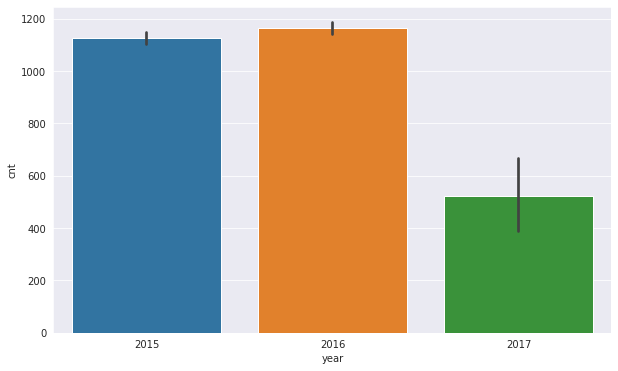

In [ ]:
# with barplot


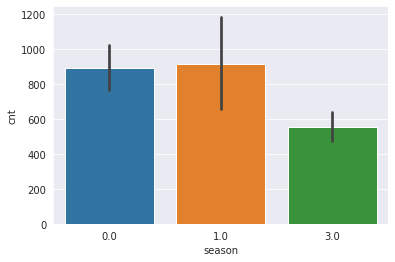

In [168]:
# with barplot

sns.barplot(data = df2[df2.is_holiday == 1], x = 'season', y = 'cnt');

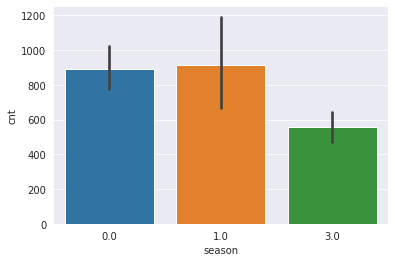

In [ ]:
# with barplot

### **15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot**

In [170]:
weekend_sharing = df2.is_weekend.value_counts()

In [171]:
weekend_sharing

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

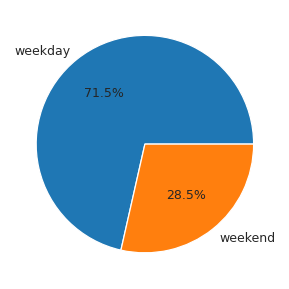

In [172]:
plt.figure(dpi=90)
plt.pie(weekend_sharing, labels = ['weekday', 'weekend'], autopct="%.1f%%");

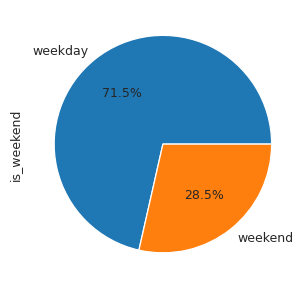

In [173]:
plt.figure(dpi=90)
weekend_sharing.plot.pie(labels = ['weekday', 'weekend'], autopct="%.1f%%");

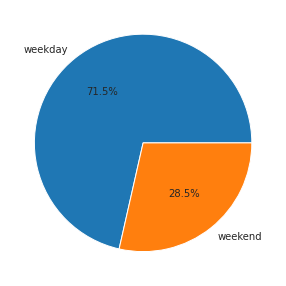

In [ ]:
# pie chart

In [174]:
x = df2.is_weekend.value_counts().index
y = df2.is_weekend.value_counts().values

In [175]:
x

Float64Index([0.0, 1.0], dtype='float64')

In [176]:
y

array([12444,  4970])

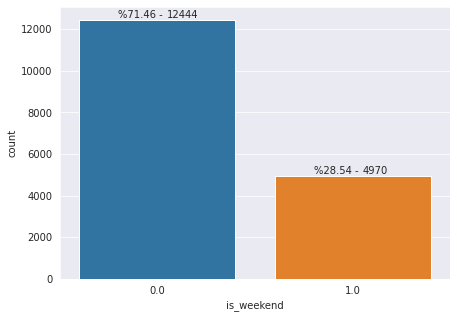

In [181]:
# with countplot

fig, ax = plt.subplots(figsize = (7,5))
# ax = sns.catplot(x='is_weekend', data=df2, kind="count", height=4, aspect=.7);
ax = sns.countplot(x = "is_weekend", data = df2 )

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() + 0.45, p.get_height() + 80));
    ax.annotate("%" + str(round((p.get_height() / df2.is_weekend.count())*100,2)) 
    + " - " , (p.get_x() + 0.2, p.get_height() + 80));

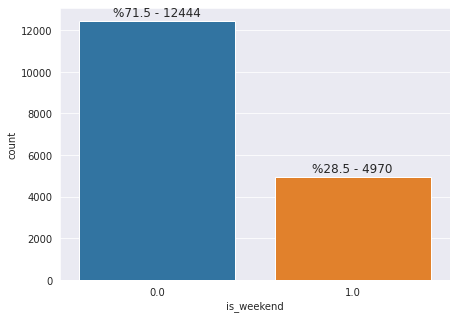

In [ ]:
# with countplot



### **16.Plot the distribution of weather code by seasons**

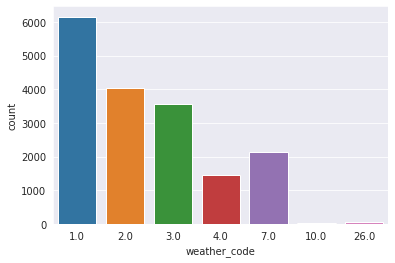

In [184]:
# with countplot

fig, ax = plt.subplots(figsize = (6, 4))
ax = sns.countplot(x = "weather_code", data = df2 )

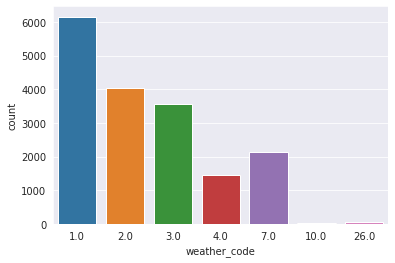

In [ ]:
# with countplot


<Figure size 1400x400 with 0 Axes>

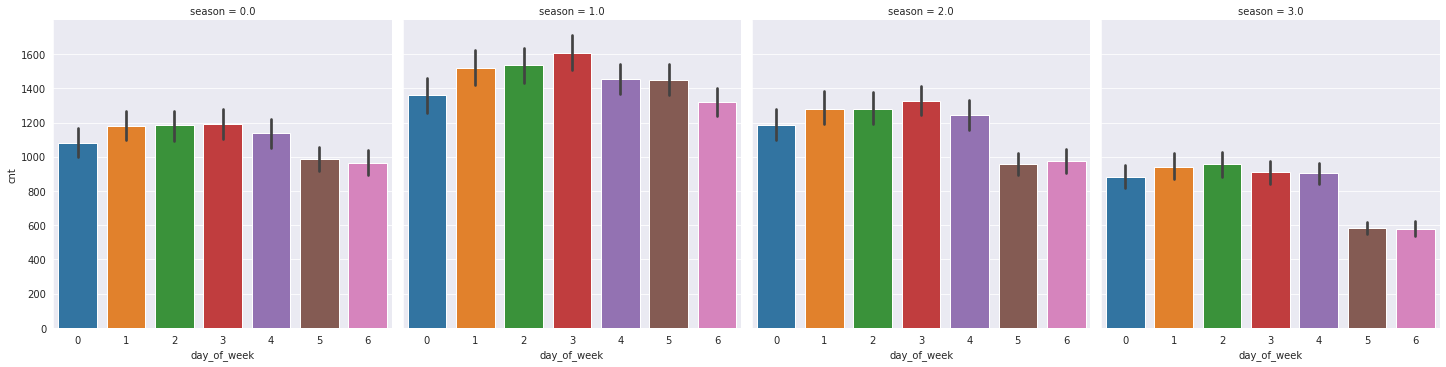

In [185]:
# with catplot

plt.figure(figsize = (14, 4), dpi=100)
sns.catplot(x = "day_of_week", y = "cnt",  kind="bar", col='season', data = df2);

<Figure size 1400x400 with 0 Axes>

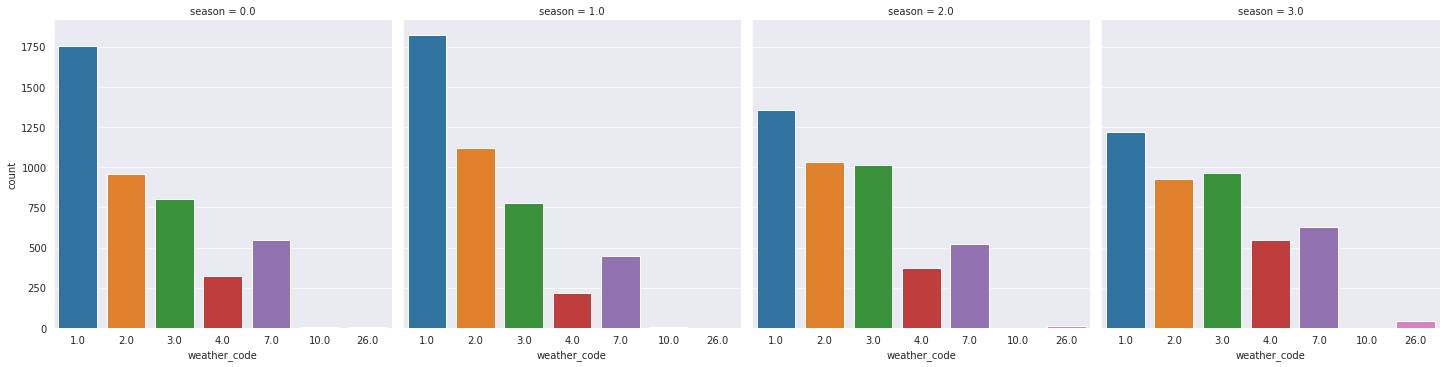

In [187]:
# with catplot

plt.figure(figsize = (14, 4), dpi=100)
sns.catplot(x='weather_code',  kind="count", col='season', data = df2);

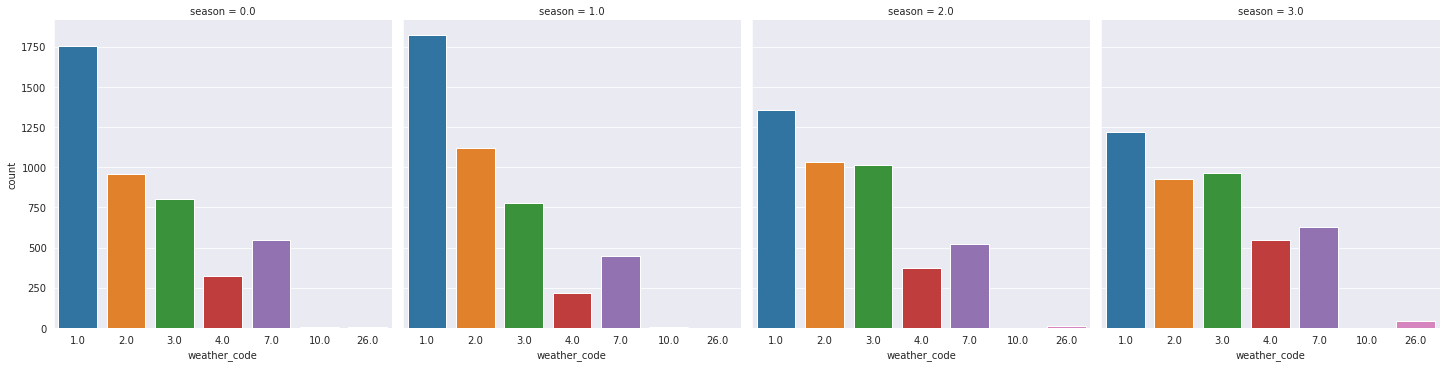

In [ ]:
# with catplot

### **17.Visulaize all the continuous variables with histogram and scatterplot**

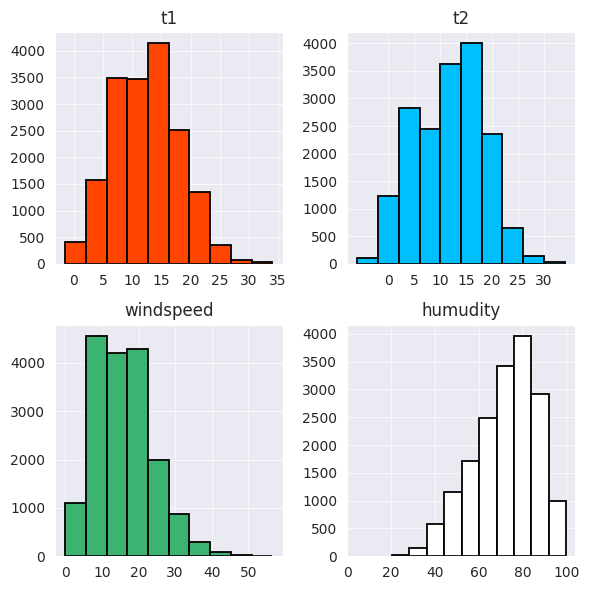

In [198]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize = (6, 6), dpi = 100)

n_bins = 10

colors = ['orangered', 'deepskyblue', 'mediumseagreen' , 'white']

ax0.hist(df2['t1'], n_bins,  histtype='bar', color=colors[0], edgecolor='black', linewidth=1.3)
ax0.set_title('t1')

ax1.hist(df2['t2'], n_bins,  histtype='bar',  color=colors[1], edgecolor='black', linewidth=1.3)
ax1.set_title('t2')

ax2.hist(df2['wind_speed'], n_bins,  histtype='bar', color=colors[2], edgecolor='black', linewidth=1.3)
ax2.set_title('windspeed')

ax3.hist(df2['hum'], n_bins, histtype='bar', color=colors[3], edgecolor='black', linewidth=1.3)
ax3.set_title('humudity')

ax0.grid(True, linewidth= 0.5, color='white', linestyle='-')
ax1.grid(True, linewidth= 0.5, color='white', linestyle='-')
ax2.grid(True, linewidth= 0.5, color='white', linestyle='-')
ax3.grid(True, linewidth= 0.5, color='white', linestyle='-')

ax0.set_xticks(np.arange(0, 40, step=5))
ax0.set_yticks(np.arange(0, 4500, step=500))

ax1.set_xticks(np.arange(0, 35, step=5))
ax1.set_yticks(np.arange(0, 4500, step=500))

ax2.set_xticks(np.arange(0, 60, step=10))
ax2.set_yticks(np.arange(0, 4500, step=1000))

ax3.set_xticks(np.arange(0, 105, step=20))
ax3.set_yticks(np.arange(0, 4500, step=500))


fig.tight_layout();

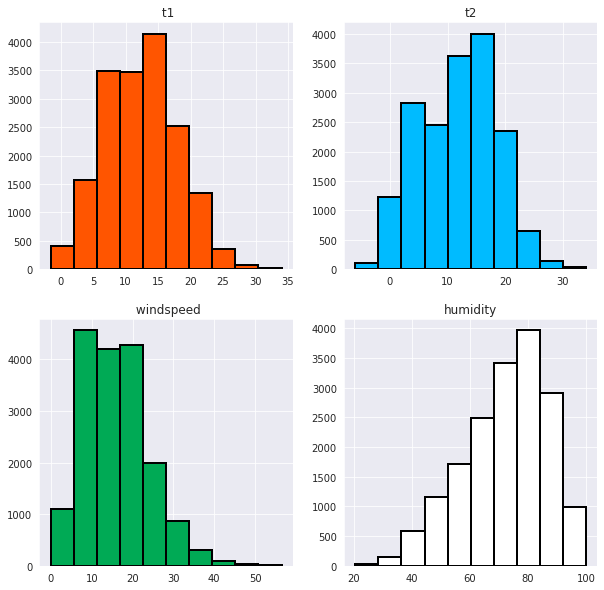

In [ ]:
# matplotlip hist


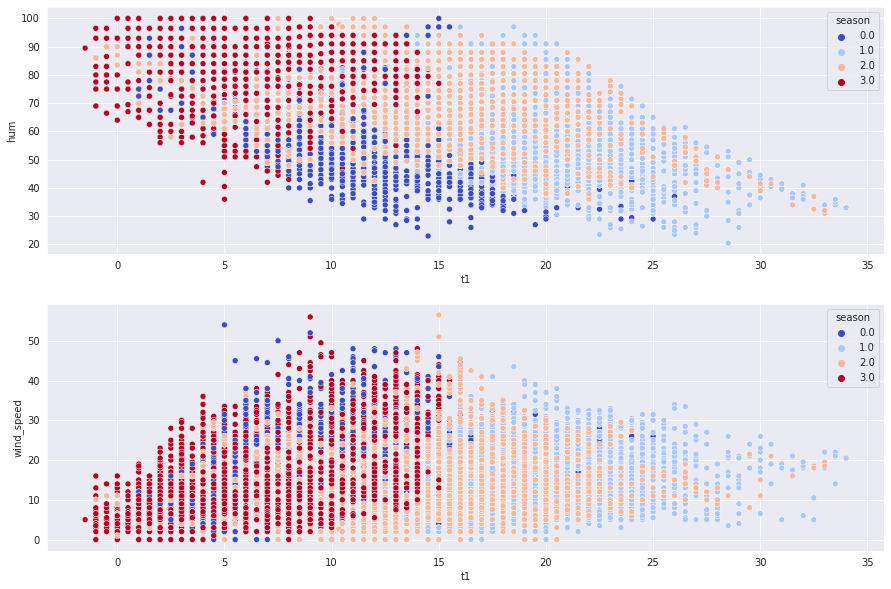

In [192]:
# seaborn

fig, ax = plt.subplots(2,1,figsize = (15,10))
sns.scatterplot(ax=ax[0], x='t1', y='hum', hue='season', data= df2, palette='coolwarm')
sns.scatterplot(ax=ax[1], x='t1', y='wind_speed', hue='season', data= df2, palette='coolwarm');

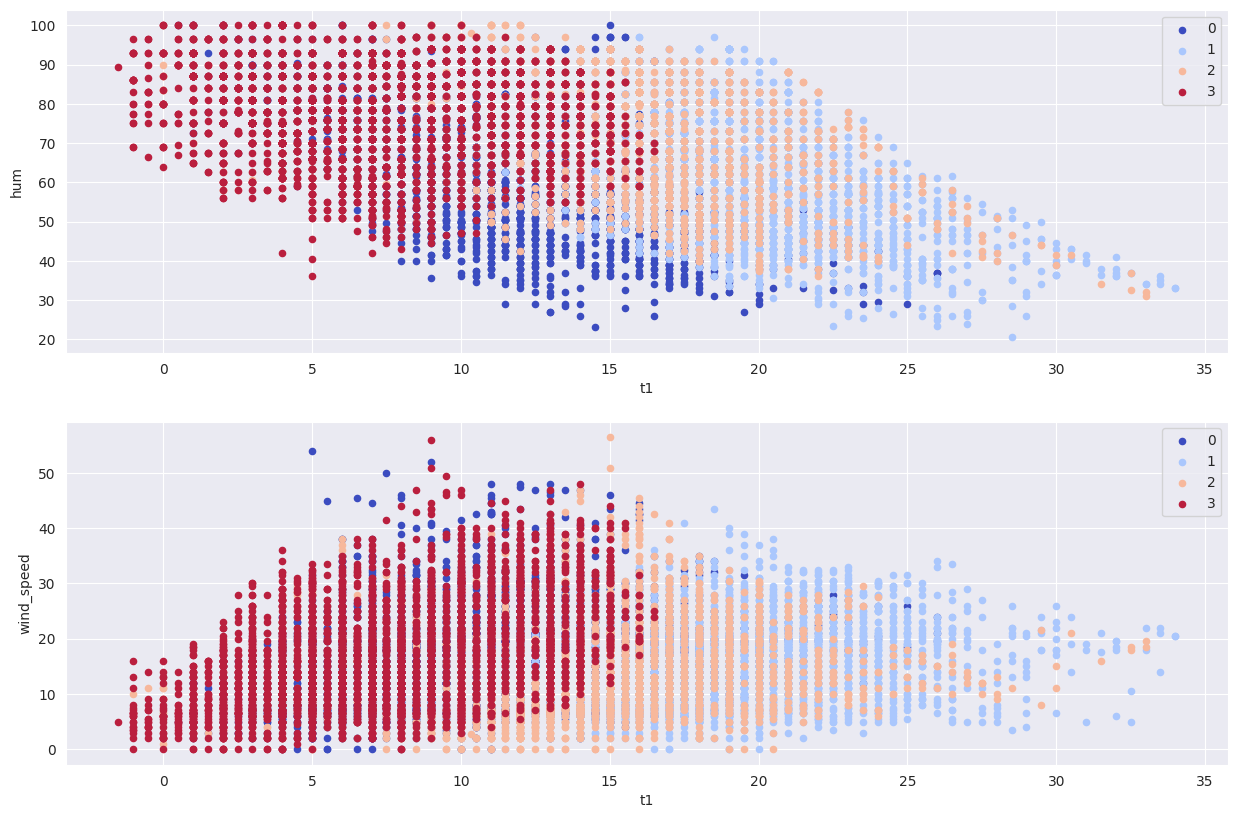

In [194]:
# matplotlib scatterplot

fig, ax = plt.subplots(2,1,figsize = (15, 10), dpi = 100)

df2.season = df2.season.astype(int)

grouped = df2.groupby('season')

my_color = ['#3b4cc0', '#aac7fd', '#f7b89c', '#ba1f3e']

for key, group in grouped:
    group.plot(ax=ax[0], kind='scatter', x='t1', y='hum', label=key, color=my_color[key])

for key, group in grouped:
    group.plot(ax=ax[1], kind='scatter', x='t1', y='wind_speed', label=key, color=my_color[key])

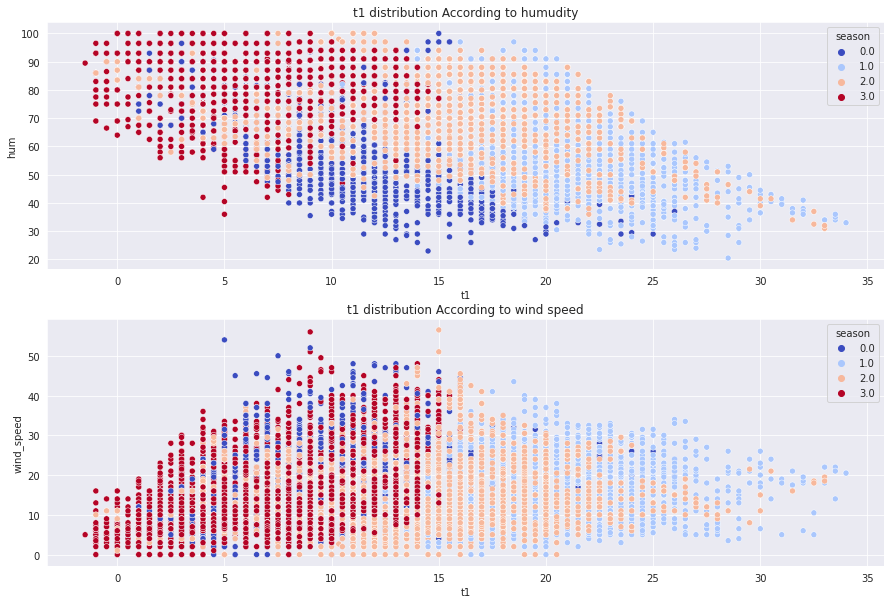

In [ ]:
# matplotlib scatterplot

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___